## Clustering


- Apply clustering algorithms to group policyholders based on similar characteristics and behavior. 
- Identify customer segments with common insurance needs and preferences. 
- Tailor marketing strategies and product offerings to specific clusters, enhancing customer engagement and increasing cross-selling opportunities.

In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from statsmodels.formula.api import ols

In [2]:
# Load the insurance dataset

raw_data_file_path = 'D:/HTML/Hannan/medical_insurance_premium.csv'
raw_data = pd.read_csv(raw_data_file_path)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
raw_data_plot=raw_data.drop(["sex", "smoker", "region"], axis=1).copy() # only continuous variable dataset will be used for plots

In [5]:
raw_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 0, 'Region')

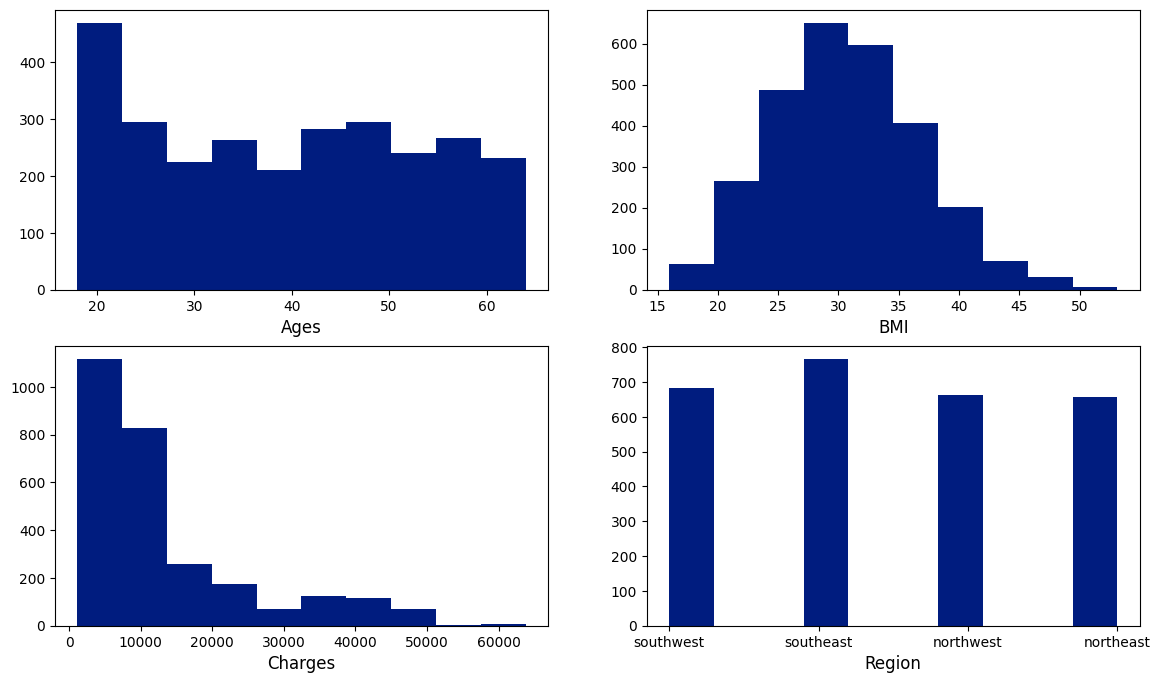

In [7]:
# Plotting histogram for Ages, BMI, Charges and Region

plt.figure(figsize=(14,8))
style.use("seaborn-v0_8-dark-palette")

plt.subplot(2,2,1)
plt.hist(raw_data["age"])
plt.xlabel("Ages", fontsize=12)

plt.subplot(2,2,2)
plt.hist(raw_data["bmi"])
plt.xlabel("BMI", fontsize=12)

plt.subplot(2,2,3)
plt.hist(raw_data["charges"])
plt.xlabel("Charges", fontsize=12)

plt.subplot(2,2,4)
plt.hist(raw_data["region"])
plt.xlabel("Region", fontsize=12)

### Correlation

In [8]:
corr_mat=raw_data_plot.corr()  #  correlation matrix of the numerical variables 
corr_mat

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


<Axes: >

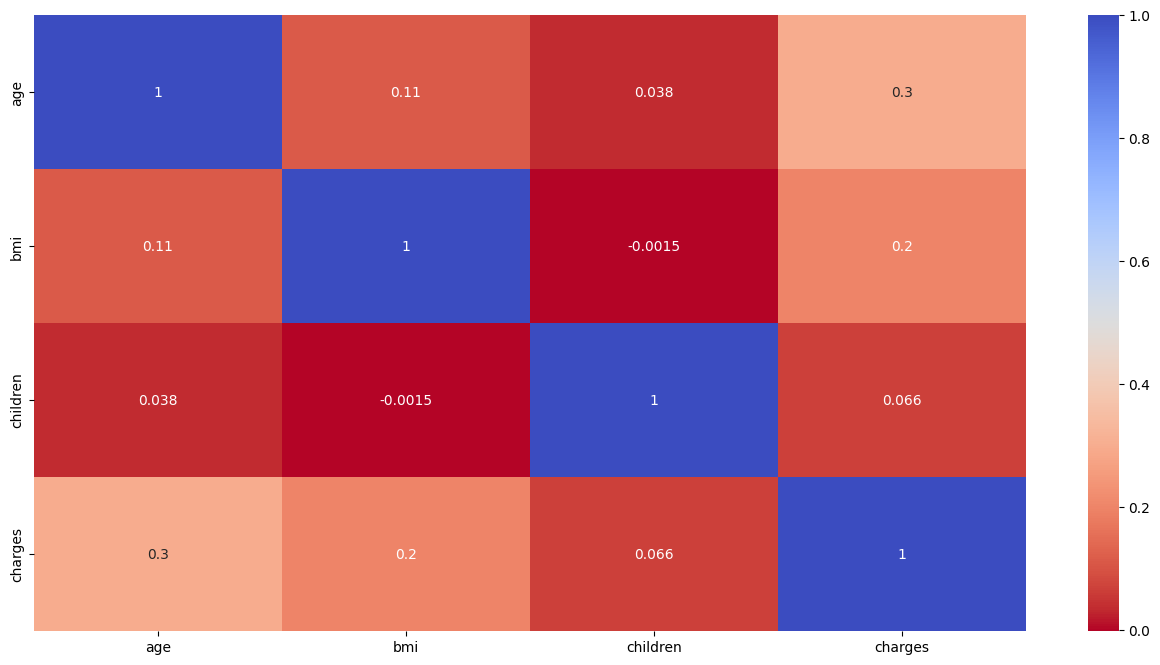

In [9]:
plt.figure(figsize=(16,8))


sns.heatmap(corr_mat, annot=True,cmap="coolwarm_r")

Age and charges have slightly positive correlation

In [10]:
raw_data.age.describe()

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [17]:
# Relationship b/w Age and Charges

# Converting Age to categorical values like Teen, Adult, Old to analyze with charges

In [11]:
raw_data.loc[(raw_data.age>17) & (raw_data.age<=30), "Age_Category"]="Young Adult"
raw_data.loc[(raw_data.age>30) & (raw_data.age<=59), "Age_Category"]="Adult"
raw_data.loc[(raw_data.age>59), "Age_Category"]="Old"

raw_data

,age,sex,bmi,children,smoker,region,charges,Age_Category
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult
2769,19,male,26.030,1,yes,northwest,16450.89470,Young Adult
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult


In [12]:
labels=raw_data.Age_Category.unique().tolist()  # Converting all the unique values in Age_Category to list
count=raw_data.Age_Category.value_counts()      #  counts the frequency of each unique value in the 'Age_Category' column

print(count)


Age_Category
Adult          1608
Young Adult     932
Old             232
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x17556998280>,
 [Text(-0.29874403039109315, 1.1622185699366905, 'Young Adult'),
  Text(-0.012466294999201924, -1.0999293574993774, 'Adult'),
  Text(1.0621950914610092, -0.28590485773441915, 'Old')],
 [Text(-0.174267351061471, 0.6779608324630694, '58.0%'),
  Text(-0.006799797272291958, -0.599961467726933, '33.6%'),
  Text(0.579379140796914, -0.15594810421877406, '8.4%')])

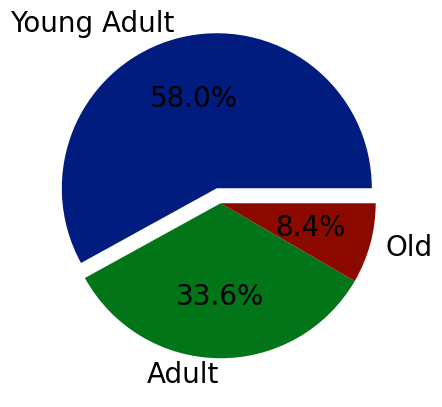

In [15]:
#count=count.values

plt.figure(figsize=(5,8))
explode=(0.1,0,0)
plt.pie(count, labels=labels,explode=explode, autopct="%1.1f%%", textprops={'fontsize': 20})

In [16]:
# Logarithmic Transformation of charges column to get rid of outliers

raw_data['log_charges'] = np.log(raw_data['charges'])
raw_data

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult,9.056007
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult,7.610940
2769,19,male,26.030,1,yes,northwest,16450.89470,Young Adult,9.708135
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult,9.980235


Text(0.5, 0, 'Log of Charges')

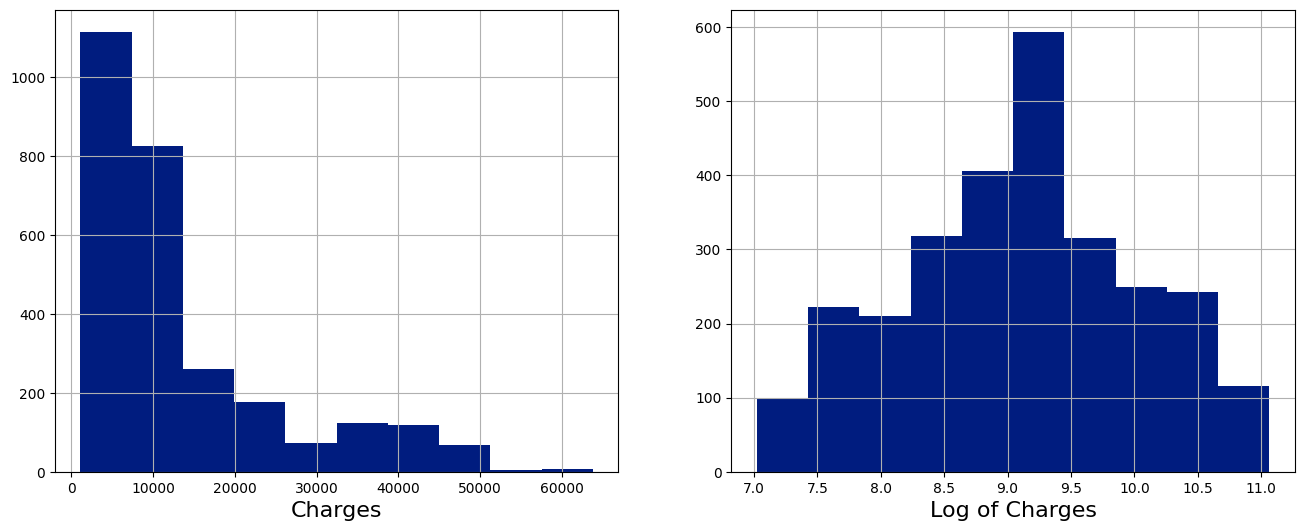

In [17]:
plt.figure(figsize=(16,6))

# Creating histogram for charges column
plt.subplot(1,2,1)
raw_data["charges"].hist()
plt.xlabel("Charges", fontsize=16)

# Creating histogram for log_charges column
plt.subplot(1,2,2)
raw_data["log_charges"].hist()
plt.xlabel("Log of Charges", fontsize=16)

C:\Users\moham\AppData\Local\Temp\ipykernel_10468\2775277415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = raw_data["sex"], y= raw_data["charges"], palette ="seismic") # seismic palette is used to color the points.
d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\moham\AppData\Local\Temp\ipykernel_10468\2775277415.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

<Axes: xlabel='sex', ylabel='log_charges'>

d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


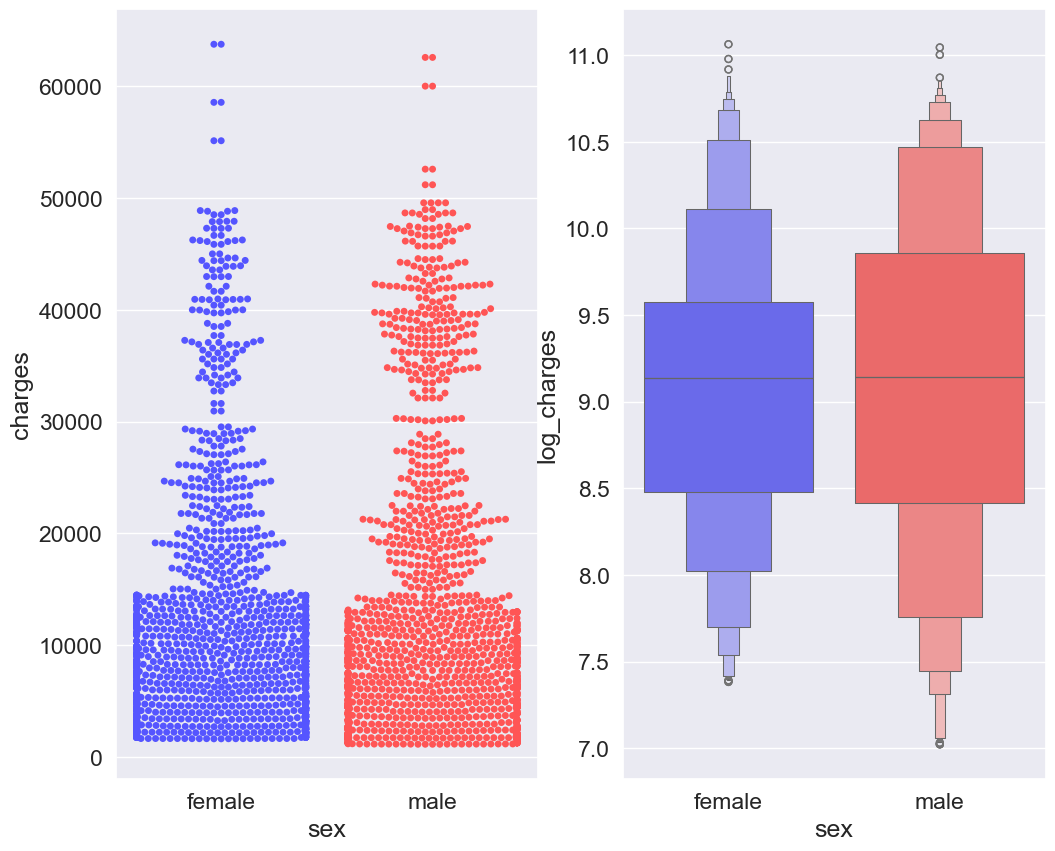

In [23]:
plt.figure(figsize=(12,10)) # Width = 15 inches and height = 10 inches
sns.set(font_scale=1.5) # font scale for all text elements is set to 1.5 times the default size

# Creating a swarm plot for sex and charges
plt.subplot(1,2,1)
sns.swarmplot(x = raw_data["sex"], y= raw_data["charges"], palette ="seismic") # seismic palette is used to color the points.

# Creating a boxenplot for sex and log_charges
plt.subplot(1,2,2)
sns.boxenplot(x= raw_data["sex"], y= raw_data["log_charges"], palette ="seismic")

From these plots, we can see that the distribution of charges (medical costs) is similar for both males and females. The average (mean) charge is around $10,000 for both genders.
This similarity in the distribution of charges for males and females suggests that the medical charges are independent of gender.

## Relationship b/w BMI and Gender

C:\Users\moham\AppData\Local\Temp\ipykernel_10468\2604215779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x= raw_data["sex"], y= raw_data["bmi"], palette ="seismic_r")


<Axes: xlabel='sex', ylabel='bmi'>

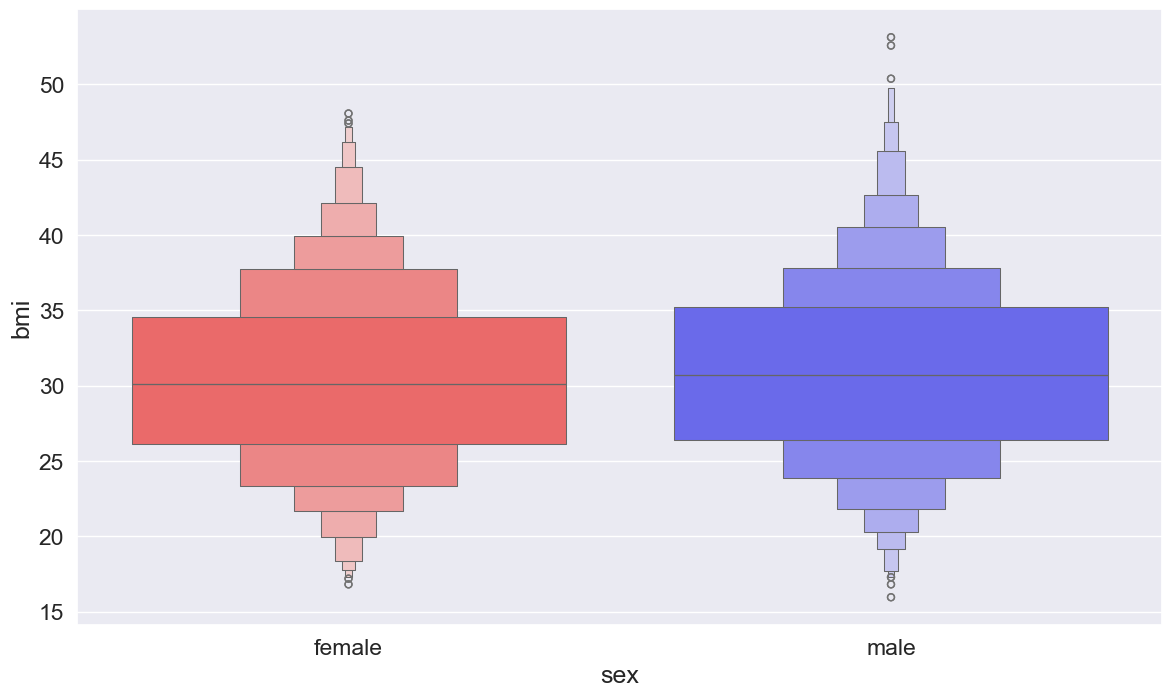

In [25]:
# Creating boxenplot for sex and bmi
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.boxenplot(x= raw_data["sex"], y= raw_data["bmi"], palette ="seismic_r")

In [26]:
# Male bmi has some outliers

In [27]:
raw_data

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult,9.056007
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult,7.610940
2769,19,male,26.030,1,yes,northwest,16450.89470,Young Adult,9.708135
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult,9.980235


In [28]:
# Creating new categorical column bmi_cateory

raw_data.loc[(raw_data.bmi< 18.5), "BMI_cateory"]="Underweight"

raw_data.loc[(raw_data.bmi>=18.5) & (raw_data.bmi<25), "BMI_cateory"]="Normal"

raw_data.loc[(raw_data.bmi>=25) & (raw_data.bmi<30), "BMI_cateory"]="Overweight"

raw_data.loc[(raw_data.bmi>=30), "BMI_cateory"]="Obesity"

raw_data

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges,BMI_cateory
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Overweight
...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult,9.056007,Obesity
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult,7.610940,Obesity
2769,19,male,26.030,1,yes,northwest,16450.89470,Young Adult,9.708135,Overweight
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult,9.980235,Normal


Relationship b/w BMI and charges

Text(0, 0.5, 'Count')

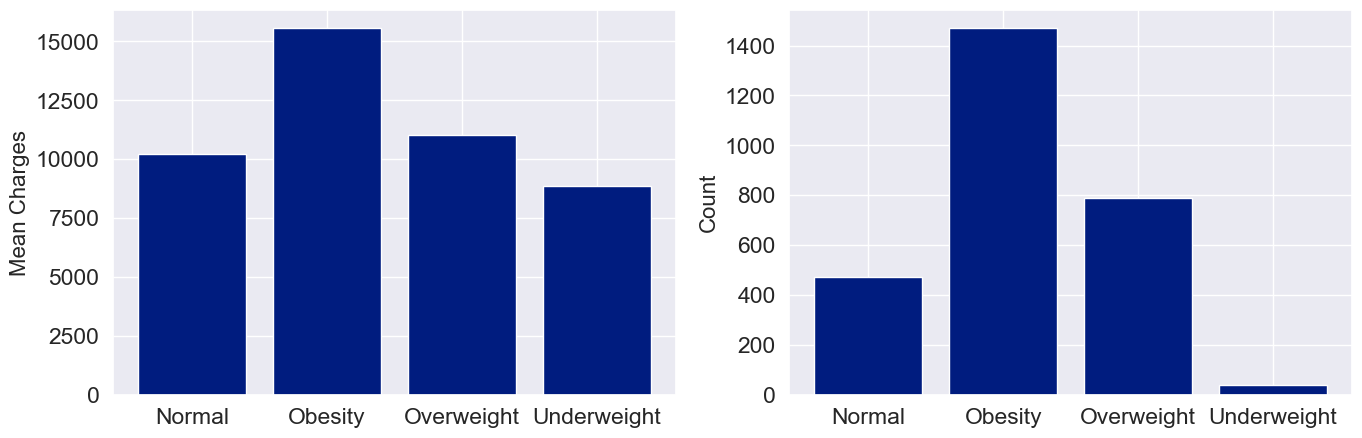

In [32]:
bmi_avg_charge=raw_data.groupby("BMI_cateory")["charges"].mean()  # Grouping based on BMI_cateory and finding the mean of charges
labels_a=bmi_avg_charge.keys()     # labels_a will contain the column_names of bmi_avg_charge calculated above
bmi_avg_charge=bmi_avg_charge.tolist()                        # Converting bmi_avg_charge values to list

bmi_count_charge=raw_data.groupby("BMI_cateory")["charges"].count()  # Grouping based on BMI_cateory and finding the count of charges
labels_c=bmi_count_charge.keys()    # labels_c will contain the column_names of bmi_count_charge calculated above
bmi_count_charge=bmi_count_charge.tolist()    # Converting bmi_count_charge values to list


style.use("seaborn-v0_8-dark-palette")
plt.figure(figsize=(16,5))

# Bar chart for Average Charges
plt.subplot(1,2,1)
plt.bar(labels_a, bmi_avg_charge)
plt.ylabel("Mean Charges", fontsize=16)

# Bar chart for Count og Charges
plt.subplot(1,2,2)
plt.bar(labels_c, bmi_count_charge)
plt.ylabel("Count", fontsize=16)


  From the above plots we can see obesity has quite a impact on medical cost. The mean cost for Obese patients is above \$15,000. Thus its better to keep our weights under control.

### Relationship b/w Smoking and Charges

d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\HTML\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


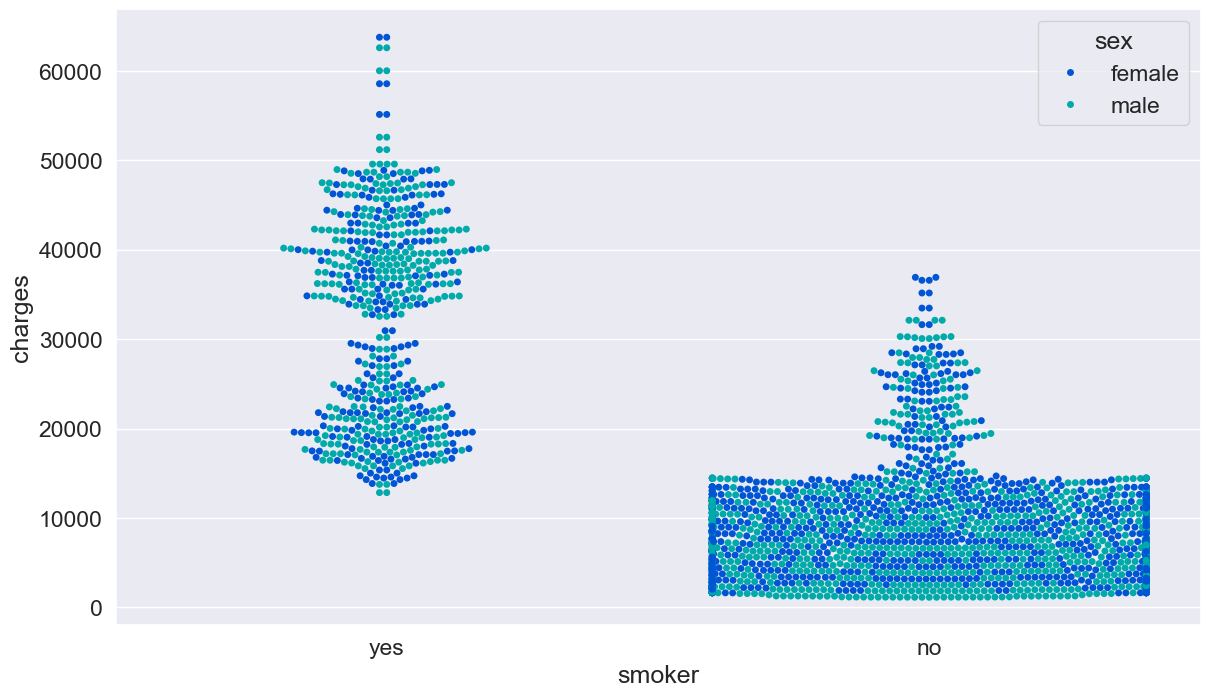

In [33]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)

# Creating swarmplot for smoker against charges
sns.swarmplot(x= raw_data["smoker"], y= raw_data["charges"],hue=raw_data["sex"], palette="winter")

* From the above chart we can see medical cost of smoker is high when compared to non-smoker. The mean cost of non-smoker is around \$10,000.
* Whereas, the mean cost of smoker is ranging from $15,000  to \$50,000. Smoking and medical cost as direct relationship.

### Standardization

In [34]:
raw_data_plot     # Data after dropping categorical columns

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
2767,47,45.320,1,8569.86180
2768,21,34.600,0,2020.17700
2769,19,26.030,1,16450.89470
2770,23,18.715,0,21595.38229


In [42]:
std_scl=StandardScaler()

raw_data_std=std_scl.fit_transform(raw_data_plot)    # Scaling age, bmi, children and charges columns 

print("      Age,         bmi,    children,    charges")

print(raw_data_std)

      Age,         bmi,    children,    charges
[[-1.42835311 -0.45711365 -0.9070836   0.29824529]
 [-1.49938129  0.50073091 -0.08375821 -0.94948308]
 [-0.7890995   0.37508521  1.56289256 -0.72528517]
 ...
 [-1.42835311 -0.76225322 -0.08375821  0.26252147]
 [-1.14424039 -1.95588746 -0.9070836   0.68595083]
 [ 1.05763316  0.14663846 -0.9070836  -0.28074541]]


In [43]:
bmi_charg_c=raw_data_std[:,[1,3]]     # Selecting bmi and charges column from raw_data_std
print(bmi_charg_c)

print(bmi_charg_c.shape)              # Printing the size of bmi_charge_c

[[-0.45711365  0.29824529]
 [ 0.50073091 -0.94948308]
 [ 0.37508521 -0.72528517]
 ...
 [-0.76225322  0.26252147]
 [-1.95588746  0.68595083]
 [ 0.14663846 -0.28074541]]
(2772, 2)


## Clustering

Using Kmeans

In [44]:
wss=[]            # Creating empty lists for wss and silhouette score
sil=[]

for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)   # Training the k-means clustering algorithm on the dataset bmi_charg_c
    wss.append(kmeans.inertia_)     # Calculating how tightly the data points are grouped around the cluster centers                                
    labels=kmeans.labels_           # Storing cluster labels for each data point in labels variable
    silhoutte=silhouette_score(bmi_charg_c, labels, metric = 'euclidean') # Computing silhouette score for each data point
    sil.append(silhoutte)

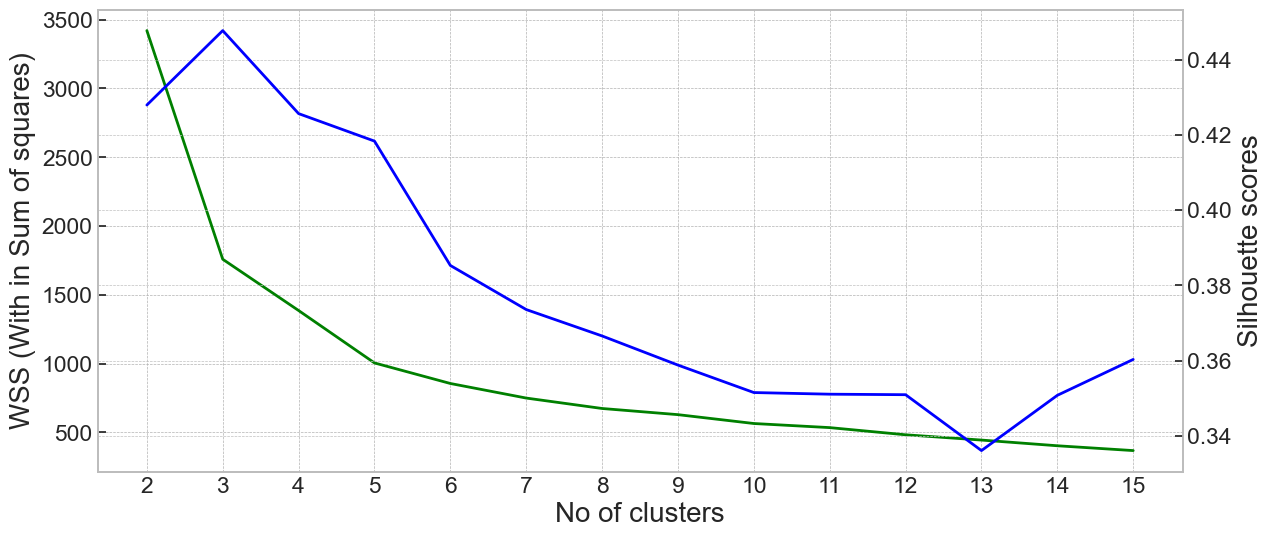

In [48]:
# Creating a dual-axis plot which is a powerful way to visualize how two different metrics change with the number of clusters (k) in k-means clustering.

k=range(2,16)

style.use("bmh") # Bayesian Methods for Hackers --> This style makes plots look clean and professional.

fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")              # Background color of the plot area to white.
ax.plot(k, wss, color="green")         # x-axis - number of clusters (k), y-axis -  WSS values with a green line.

ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True)) # This ensures that the x-axis has ticks at each integer value from 2 to 15
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)

ax2=ax.twinx()                         # This allows us to plot another set of data on the same plot.

ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)

ax2.grid(True,color="silver")
plt.show()

In [49]:
# elbow best position (like elbow decreasing) @ 3
#Sil score at max @ 3

In [50]:
kmeans=KMeans(n_clusters=3, random_state=1).fit(bmi_charg_c) # KMeans object with 3 clusters and random state for reproducibilty

clusters=kmeans.labels_                   # Retrieving the cluster labels assigned to each data point

centrods=kmeans.cluster_centers_          # Retrieving the coordinates of the centroids (centers) of the 3 clusters

raw_data["clusters"]=clusters            # Creating new column "clusters" 

raw_data

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges,BMI_cateory,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Overweight,0
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Obesity,1
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Obesity,1
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Normal,0
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Overweight,0
...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult,9.056007,Obesity,1
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult,7.610940,Obesity,1
2769,19,male,26.030,1,yes,northwest,16450.89470,Young Adult,9.708135,Overweight,0
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult,9.980235,Normal,0


In [52]:
raw_data2=raw_data.sort_values(["clusters"]).copy()  # Sorting the values of clusters column and creating a copy of the sorted df

In [54]:
for i in range(0,4):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))  # Converting integer into ASCII Character
    
raw_data2

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges,BMI_cateory,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Overweight,A
1075,32,female,29.590,1,no,southeast,4562.84210,Adult,8.425701,Overweight,A
1074,60,female,18.335,0,no,northeast,13204.28565,Old,9.488297,Underweight,A
1073,54,female,28.880,2,no,northeast,12096.65120,Adult,9.400684,Overweight,A
2123,26,male,23.700,2,no,southwest,3484.33100,Young Adult,8.156031,Normal,A
...,...,...,...,...,...,...,...,...,...,...,...
621,37,male,34.100,4,yes,southwest,40182.24600,Adult,10.601181,Obesity,C
623,18,male,33.535,0,yes,northeast,34617.84065,Young Adult,10.452124,Obesity,C
629,44,female,38.950,0,yes,northwest,42983.45850,Adult,10.668571,Obesity,C
2015,44,female,38.950,0,yes,northwest,42983.45850,Adult,10.668571,Obesity,C


In [56]:
raw_data2["clusters"].unique()   # Unique values in clusters column

array(['A', 'B', 'C'], dtype=object)

In [57]:
x=raw_data2.iloc[:,[2,6]].values # Selecting values of all the rows and 3 and 7 columns
print(x.shape)
y=kmeans.fit_predict(x)          
print(y.shape)

(2772, 2)
(2772,)


Text(0.5, 1.0, 'Charges depends on BMI??')

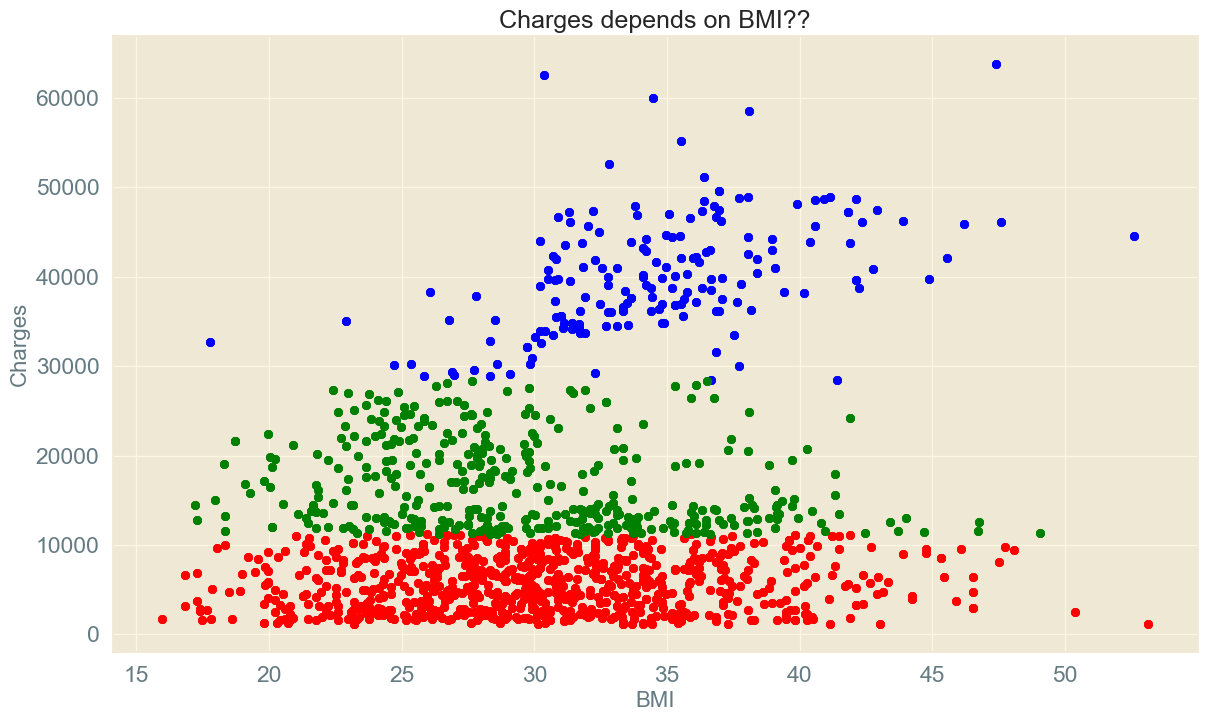

In [58]:
# Creating a scatter plot for BMI against Charges
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")    # Setting the appearance of the plot
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A") # Plotting the data points belonging to cluster 0. The points are shown in red, and they're labeled as "A".
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B") # Plotting the data points belonging to cluster 1. The points are shown in blue, and they're labeled as "B".
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C") # Plotting the data points belonging to cluster 2. The points are shown in green, and they're labeled as "C".

plt.xlabel("BMI", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on BMI??", fontsize=18)

From the above as we have defined we got 3 distinct clusters. With BMI (15 to 30) has a expense of mostly \$10,000 to \$30,000 whereas higher BMI's have much higher cost.

### Clustering for Age

In [59]:
raw_data_std

array([[-1.42835311, -0.45711365, -0.9070836 ,  0.29824529],
       [-1.49938129,  0.50073091, -0.08375821, -0.94948308],
       [-0.7890995 ,  0.37508521,  1.56289256, -0.72528517],
       ...,
       [-1.42835311, -0.76225322, -0.08375821,  0.26252147],
       [-1.14424039, -1.95588746, -0.9070836 ,  0.68595083],
       [ 1.05763316,  0.14663846, -0.9070836 , -0.28074541]])

In [60]:
age_charg_c=raw_data_std[:,[0,3]] # Selecting values from all the rows and columns 1 and 4 
print(age_charg_c)
print(age_charg_c.shape)

[[-1.42835311  0.29824529]
 [-1.49938129 -0.94948308]
 [-0.7890995  -0.72528517]
 ...
 [-1.42835311  0.26252147]
 [-1.14424039  0.68595083]
 [ 1.05763316 -0.28074541]]
(2772, 2)


In [61]:
wss=[]
sil=[]

for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)  # Training the k-means clustering algorithm on the dataset age_charg_c
    wss.append(kmeans.inertia_)                                   # Calculating how tightly the datqa points are grouped around the cluster centres
    labels=kmeans.labels_                                         # Stroing cluster labels for each data point in labels variable
    silhoutte=silhouette_score(age_charg_c, labels, metric = 'euclidean') # Computing silhouette score for each data point
    sil.append(silhoutte)

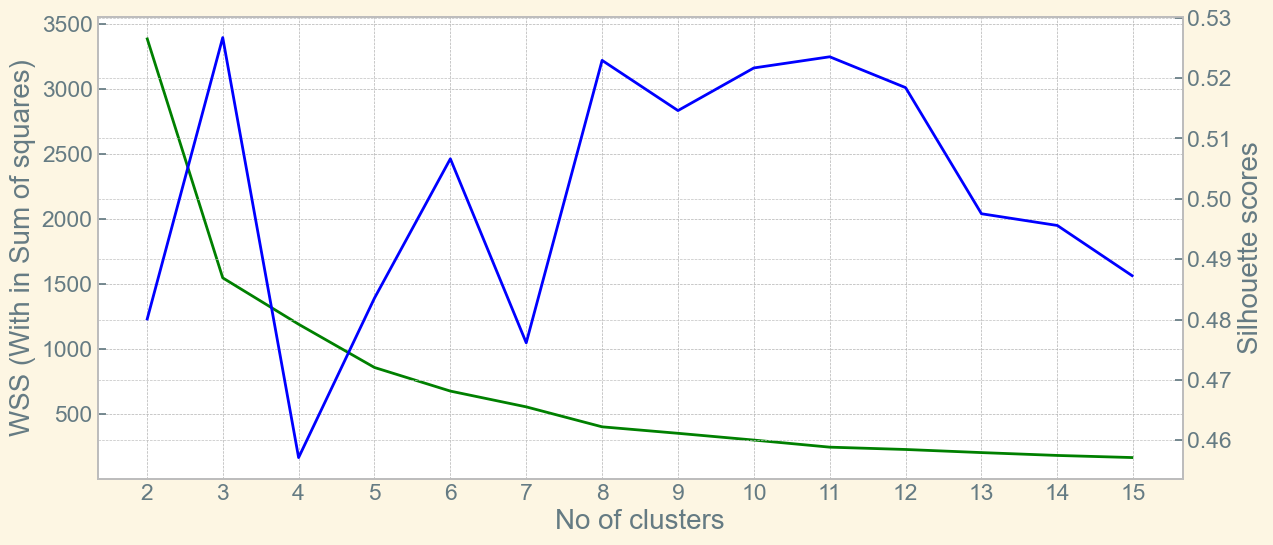

In [62]:
k=range(2,16)
style.use("bmh")   # Bayesian Methods for Hackers --> This style makes plots look clean and professional

fig,ax=plt.subplots(figsize=(14,6))

ax.set_facecolor("white")             # Background color - white
ax.plot(k, wss, color="green")        # x-axis - number of clusters (k), y-axis - WSS values with a green line

ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True)) # This ensures that the x-axis has ticks at each integer value from 2 to 15

ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)

ax2=ax.twinx()                                # This allows us to plot another set of data on the same plot

ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)

ax2.grid(True,color="silver")
plt.show()

In [63]:
kmeans=KMeans(n_clusters=3, random_state=1).fit(age_charg_c)  # KMeans object with 3 clusters and random state for reproducibility
clusters=kmeans.labels_                      #  Retrieving the cluster labels assigned to each data point

centrids=kmeans.cluster_centers_             # Retrieving the coordinates of the centroids(centres) of the 3 clusters

raw_data["clusters"]=clusters                # Creating new column "clusters"

raw_data

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges,BMI_cateory,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Overweight,0
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Obesity,0
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Obesity,0
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Normal,0
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Overweight,0
...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult,9.056007,Obesity,2
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult,7.610940,Obesity,0
2769,19,male,26.030,1,yes,northwest,16450.89470,Young Adult,9.708135,Overweight,0
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult,9.980235,Normal,0


In [64]:
raw_data2=raw_data.sort_values(["clusters"]).copy() # Sorting the values of clusters column and creating a copy of the sorted df

In [65]:
for i in range(0,4):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65)) # Converting integer into ASCII Character
    
raw_data2

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges,BMI_cateory,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Overweight,A
1155,36,female,22.135,3,no,northeast,7228.21565,Adult,8.885747,Normal,A
2261,23,female,28.120,0,no,northwest,2690.11380,Young Adult,7.897339,Overweight,A
1153,35,female,35.815,1,no,northwest,5630.45785,Adult,8.635946,Obesity,A
1150,18,female,30.305,0,no,northeast,2203.73595,Young Adult,7.697909,Obesity,A
...,...,...,...,...,...,...,...,...,...,...,...
1266,55,female,30.500,0,no,southwest,10704.47000,Adult,9.278417,Obesity,C
1265,64,male,23.760,0,yes,southeast,26926.51440,Old,10.200867,Normal,C
1264,49,female,33.345,2,no,northeast,10370.91255,Adult,9.246760,Obesity,C
1482,54,female,30.800,3,no,southwest,12105.32000,Adult,9.401400,Obesity,C


In [66]:
raw_data2

,age,sex,bmi,children,smoker,region,charges,Age_Category,log_charges,BMI_cateory,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Overweight,A
1155,36,female,22.135,3,no,northeast,7228.21565,Adult,8.885747,Normal,A
2261,23,female,28.120,0,no,northwest,2690.11380,Young Adult,7.897339,Overweight,A
1153,35,female,35.815,1,no,northwest,5630.45785,Adult,8.635946,Obesity,A
1150,18,female,30.305,0,no,northeast,2203.73595,Young Adult,7.697909,Obesity,A
...,...,...,...,...,...,...,...,...,...,...,...
1266,55,female,30.500,0,no,southwest,10704.47000,Adult,9.278417,Obesity,C
1265,64,male,23.760,0,yes,southeast,26926.51440,Old,10.200867,Normal,C
1264,49,female,33.345,2,no,northeast,10370.91255,Adult,9.246760,Obesity,C
1482,54,female,30.800,3,no,southwest,12105.32000,Adult,9.401400,Obesity,C


Age vs Charges

In [67]:
x=raw_data2.iloc[:,[0,6]].values # Selecting values of all the rows and 1 and 7 columns
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(2772, 2)
(2772,)


Text(0.5, 1.0, 'Charges depends on Age??')

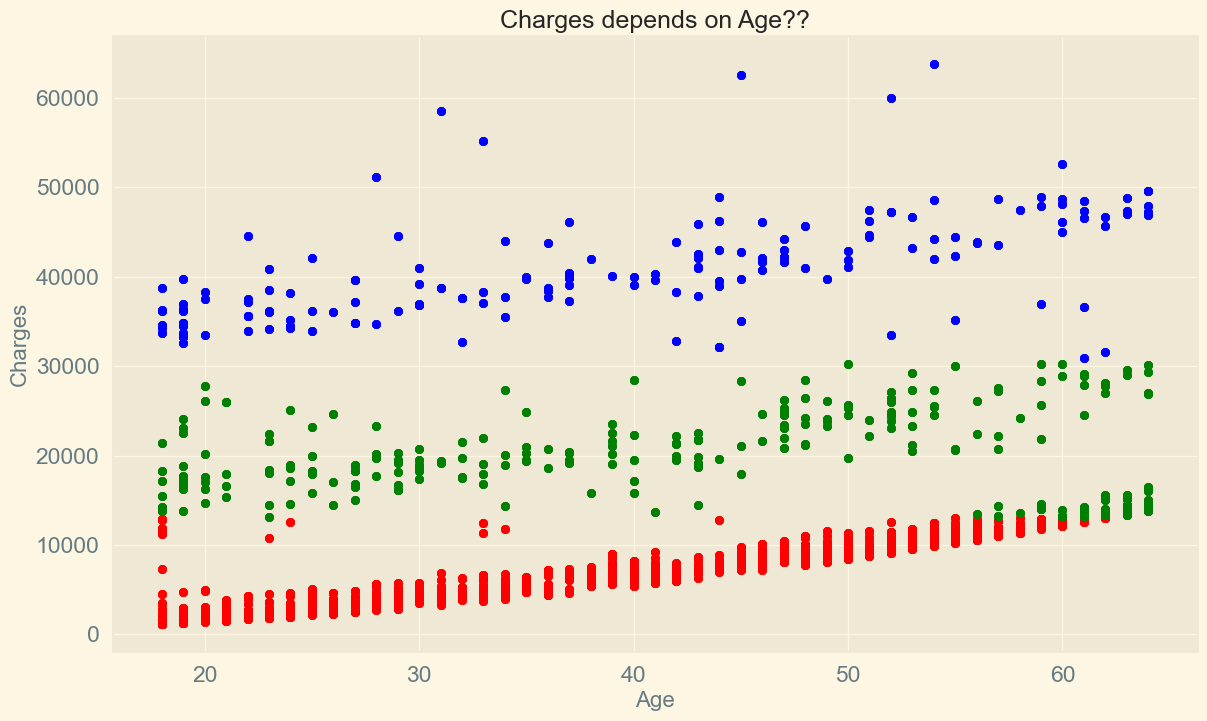

In [68]:
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")   # Setting the appearance of the plot
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A") # Plotting the data points belonging to cluster 0. The points are shown in red, and they're
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B") # Plotting the data points belonging to cluster 1. The points are shown in blue, and they're labeled as "B".
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C") # Plotting the data points belonging to cluster 2. The points are shown in green, and they're labeled as "C".

plt.xlabel("Age", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on Age??", fontsize=18)

All expenses ranges for All age groups, Not having much variations

Final Conclusion - Charges depends on above mentioned variables